In [1]:
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("bestsellers with categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.columns = df.columns.str.replace('\W+', '_').str.lower()

In [4]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
name           550 non-null object
author         550 non-null object
user_rating    550 non-null float64
reviews        550 non-null int64
price          550 non-null int64
year           550 non-null int64
genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
df['year'] = pd.to_datetime(df['year'], format='%Y') 


In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
name           550 non-null object
author         550 non-null object
user_rating    550 non-null float64
reviews        550 non-null int64
price          550 non-null int64
year           550 non-null datetime64[ns]
genre          550 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 30.2+ KB


In [8]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-01-01,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011-01-01,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-01-01,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017-01-01,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019-01-01,Non Fiction


In [9]:
genre = df['genre'].value_counts()

In [10]:
df['genre'].value_counts(normalize=True)*100

Non Fiction    56.363636
Fiction        43.636364
Name: genre, dtype: float64

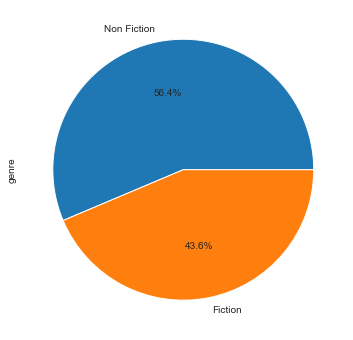

In [11]:
genre.plot.pie(autopct="%.1f%%", figsize=(12,6))

In [12]:
year_range = np.arange(np.datetime64('2009'), np.datetime64('2020'))
year_range

array(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'], dtype='datetime64[Y]')

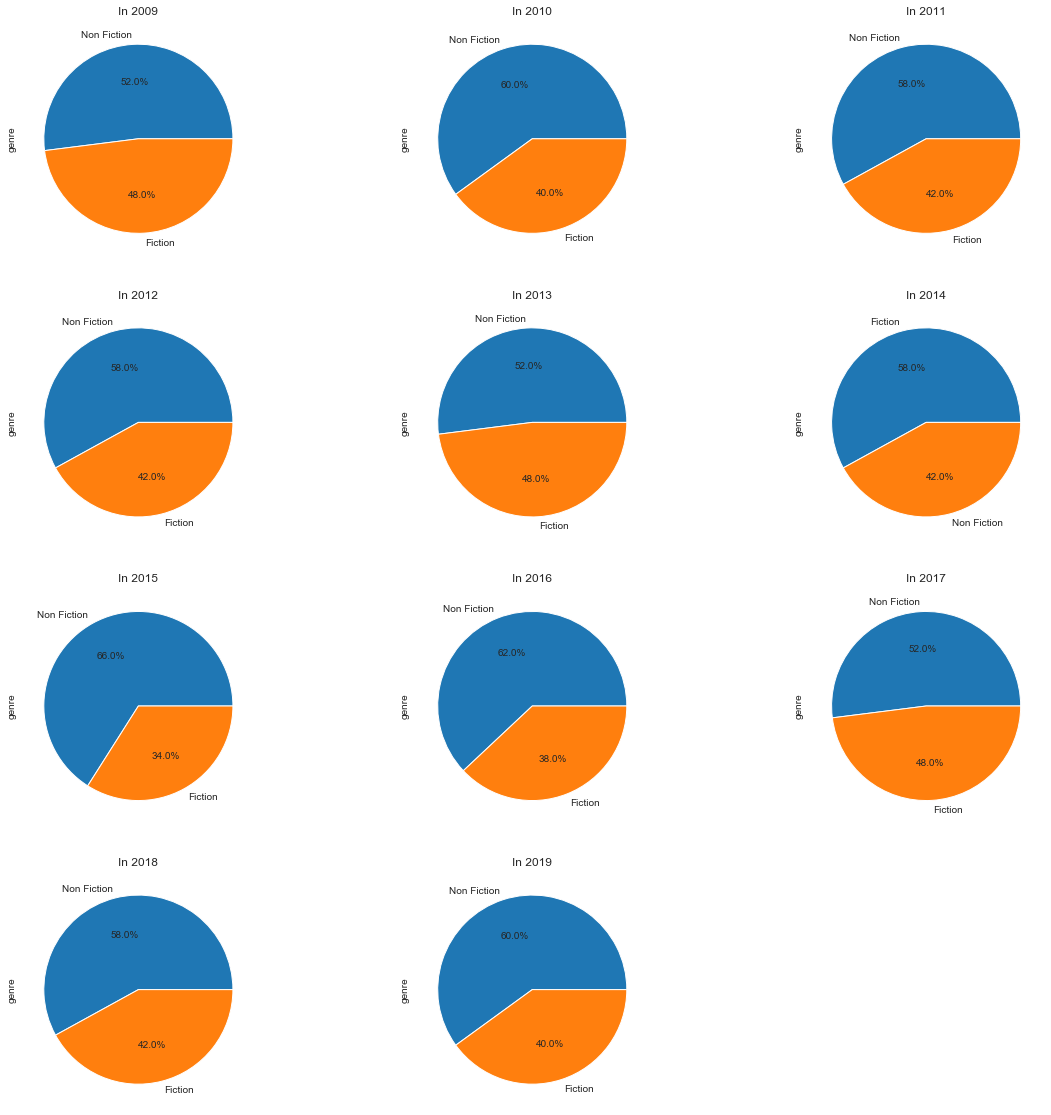

In [19]:
for i, year in enumerate(year_range):
    count = df[df['year']== year]['genre'].value_counts()
    plt.subplot(4,3,(i+1))
    count.plot.pie(autopct="%.1f%%", figsize=(20,20))
    plt.title(f'In {year}')
    

## Top 10 book in fiction & non-fiction based on rating

In [14]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-01-01,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011-01-01,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-01-01,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017-01-01,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019-01-01,Non Fiction


In [15]:
fiction_books = df[df['genre'] == 'Fiction'].sort_values(by='user_rating', ascending=False)
fiction_books[['name', 'author', 'user_rating']].head(10)

,name,author,user_rating
288,Rush Revere and the Brave Pilgrims: Time-Trave...,Rush Limbaugh,4.9
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9
219,Little Blue Truck,Alice Schertle,4.9
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9
155,Harry Potter and the Goblet of Fire: The Illus...,J.K. Rowling,4.9


In [16]:
non_fiction_books = df[df['genre'] == 'Non Fiction'].sort_values(by='user_rating', ascending=False)
non_fiction_books[['name', 'author', 'user_rating', 'year']].head(10)


,name,author,user_rating,year
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,2012-01-01
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,2014-01-01
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,2011-01-01
174,Humans of New York : Stories,Brandon Stanton,4.9,2015-01-01
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,2016-01-01
431,The Magnolia Story,Chip Gaines,4.9,2016-01-01
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,2013-01-01
521,Unfreedom of the Press,Mark R. Levin,4.9,2019-01-01
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,2015-01-01
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,2016-01-01


## Top 10 book in fiction & non-fiction based on User Review

In [17]:
fiction_books_review = df[df['genre'] == 'Fiction'].sort_values(by='reviews', ascending=False)
fiction_books_review[['name', 'author', 'reviews', 'year']].head(10)

,name,author,reviews,year
534,Where the Crawdads Sing,Delia Owens,87841,2019-01-01
382,The Girl on the Train,Paula Hawkins,79446,2015-01-01
383,The Girl on the Train,Paula Hawkins,79446,2016-01-01
135,Gone Girl,Gillian Flynn,57271,2012-01-01
136,Gone Girl,Gillian Flynn,57271,2013-01-01
137,Gone Girl,Gillian Flynn,57271,2014-01-01
365,The Fault in Our Stars,John Green,50482,2012-01-01
366,The Fault in Our Stars,John Green,50482,2013-01-01
368,The Fault in Our Stars,John Green,50482,2014-01-01
367,The Fault in Our Stars,John Green,50482,2014-01-01


In [18]:
non_fiction_books_review = df[df['genre'] == 'Non Fiction'].sort_values(by='reviews', ascending=False)
non_fiction_books_review[['name', 'author', 'reviews', 'year']].head(10)

,name,author,reviews,year
33,Becoming,Michelle Obama,61133,2019-01-01
32,Becoming,Michelle Obama,61133,2018-01-01
519,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,29673,2014-01-01
518,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,29673,2014-01-01
517,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,29673,2012-01-01
516,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,29673,2011-01-01
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,29673,2010-01-01
98,Educated: A Memoir,Tara Westover,28729,2019-01-01
97,Educated: A Memoir,Tara Westover,28729,2018-01-01
466,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,26490,2019-01-01


# END